In [65]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
os.getcwd()

'C:\\Users\\menth\\Desktop\\M1 LM\\S1\\Evolutions de la comédie au XVIIIè siècle\\Projet Saison Comédie Française'

In [66]:
# Importation des données JSON sur les performances de la Comédie Française depuis sa création jusqu'à aujourd'hui

URL = 'https://hack.cfregisters.org/data/json/performances.json'
CF_performances = pd.read_json(URL)

In [67]:
# Importation des données JSON sur les pièces de la Comédie Française depuis sa création jusqu'à aujourd'hui

URL = 'https://hack.cfregisters.org/data/json/plays.json'
CF_pièces = pd.read_json(URL)

In [68]:
print(CF_performances.info())
print('\n')
print(CF_pièces.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63452 entries, 0 to 63451
Data columns (total 6 columns):
acts                      63388 non-null float64
author                    63409 non-null object
first_performance_date    41245 non-null object
genre                     63409 non-null object
performance_date          63452 non-null object
title                     63409 non-null object
dtypes: float64(1), object(5)
memory usage: 2.9+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 15 columns):
_packed_id               1036 non-null int64
acts                     1033 non-null float64
alternative_title        938 non-null object
author                   1036 non-null object
created_at               1035 non-null datetime64[ns]
date_de_creation         920 non-null object
expert_validated         1036 non-null bool
genre                    1036 non-null object
id                       1036 non-null int64
musique_danse_machin

In [69]:
# Je merge les deux tables via les clés communes : 'author' et 'title'

CF = CF_performances.merge(CF_pièces, on="author" and 'title')
CF.head(5)

,acts_x,author_x,first_performance_date,genre_x,performance_date,title,_packed_id,acts_y,alternative_title,author_y,created_at,date_de_creation,expert_validated,genre_y,id,musique_danse_machine,prologue,prose_vers,updated_at,url
0,5.0,"Boyer (Claude, abbé) pseud : Pader d'Assézan",1680-04-30,tragédie,1680-04-30,Agamemnon ou La Mort d'Agamemnon,10,5.0,,"Boyer (Claude, abbé) pseud : Pader d'Assézan",2013-12-16 17:46:35.261786,1680-04-30,True,tragédie,5458,False,False,vers,2015-04-10 16:25:15.131767,
1,5.0,"Boyer (Claude, abbé) pseud : Pader d'Assézan",1680-04-30,tragédie,1680-05-03,Agamemnon ou La Mort d'Agamemnon,10,5.0,,"Boyer (Claude, abbé) pseud : Pader d'Assézan",2013-12-16 17:46:35.261786,1680-04-30,True,tragédie,5458,False,False,vers,2015-04-10 16:25:15.131767,
2,5.0,"Boyer (Claude, abbé) pseud : Pader d'Assézan",1680-04-30,tragédie,1680-05-05,Agamemnon ou La Mort d'Agamemnon,10,5.0,,"Boyer (Claude, abbé) pseud : Pader d'Assézan",2013-12-16 17:46:35.261786,1680-04-30,True,tragédie,5458,False,False,vers,2015-04-10 16:25:15.131767,
3,5.0,"Boyer (Claude, abbé) pseud : Pader d'Assézan",1680-04-30,tragédie,1680-05-07,Agamemnon ou La Mort d'Agamemnon,10,5.0,,"Boyer (Claude, abbé) pseud : Pader d'Assézan",2013-12-16 17:46:35.261786,1680-04-30,True,tragédie,5458,False,False,vers,2015-04-10 16:25:15.131767,
4,5.0,"Boyer (Claude, abbé) pseud : Pader d'Assézan",1680-04-30,tragédie,1680-05-10,Agamemnon ou La Mort d'Agamemnon,10,5.0,,"Boyer (Claude, abbé) pseud : Pader d'Assézan",2013-12-16 17:46:35.261786,1680-04-30,True,tragédie,5458,False,False,vers,2015-04-10 16:25:15.131767,


In [70]:
# Je filtre les dates de représentations par rapport aux dates de début et de fin de la saison qui m'intéresse (1733-1734)
start_date = "1733-04-13"
end_date = "1734-04-10"
after_start_date = CF["performance_date"] >= start_date
before_end_date = CF["performance_date"] <= end_date
between_two_dates = after_start_date & before_end_date

CF_saison = CF.loc[between_two_dates]

In [71]:
CF_saison.head(5)

,acts_x,author_x,first_performance_date,genre_x,performance_date,title,_packed_id,acts_y,alternative_title,author_y,created_at,date_de_creation,expert_validated,genre_y,id,musique_danse_machine,prologue,prose_vers,updated_at,url
407,1.0,Molière (Jean-Baptiste Poquelin dit),None,comédie,1733-07-27,Sganarelle ou le Cocu imaginaire,1012,1.0,None,Molière (Jean-Baptiste Poquelin dit),2013-05-02 10:25:06.406745,None,True,comédie,5422,False,False,vers,2014-05-08 20:46:54.615960,None
789,1.0,Molière (Jean-Baptiste Poquelin dit),None,comédie,1733-05-11,Mariage forcé (Le),768,1.0,None,Molière (Jean-Baptiste Poquelin dit),2013-05-02 10:25:04.064721,None,True,comédie,5149,True,False,prose,2014-05-08 20:46:48.060123,None
790,1.0,Molière (Jean-Baptiste Poquelin dit),None,comédie,1734-01-20,Mariage forcé (Le),768,1.0,None,Molière (Jean-Baptiste Poquelin dit),2013-05-02 10:25:04.064721,None,True,comédie,5149,True,False,prose,2014-05-08 20:46:48.060123,None
2190,3.0,Molière (Jean-Baptiste Poquelin dit),None,comédie,1733-04-19,George Dandin ou le Mari confondu,574,3.0,None,Molière (Jean-Baptiste Poquelin dit),2013-05-02 10:25:02.214058,None,True,comédie,4932,True,False,prose,2014-05-08 20:46:42.269281,None
2191,3.0,Molière (Jean-Baptiste Poquelin dit),None,comédie,1733-05-04,George Dandin ou le Mari confondu,574,3.0,None,Molière (Jean-Baptiste Poquelin dit),2013-05-02 10:25:02.214058,None,True,comédie,4932,True,False,prose,2014-05-08 20:46:42.269281,None


In [72]:
# Je ne garde ici que les variables porteuses d'informations. Les autres sont soit des variables redondantes dans les deux tables
# (performances et pièces), soient des variables binaires non porteuses d'informations car 'vraies' partout ('expert_validated')


CF_saison = CF_saison[['author_x','title','genre_x','performance_date','first_performance_date','acts_x', 'alternative_title',
                       'musique_danse_machine', 'prologue','prose_vers']]
CF_saison.head(5)

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers
407,Molière (Jean-Baptiste Poquelin dit),Sganarelle ou le Cocu imaginaire,comédie,1733-07-27,None,1.0,None,False,False,vers
789,Molière (Jean-Baptiste Poquelin dit),Mariage forcé (Le),comédie,1733-05-11,None,1.0,None,True,False,prose
790,Molière (Jean-Baptiste Poquelin dit),Mariage forcé (Le),comédie,1734-01-20,None,1.0,None,True,False,prose
2190,Molière (Jean-Baptiste Poquelin dit),George Dandin ou le Mari confondu,comédie,1733-04-19,None,3.0,None,True,False,prose
2191,Molière (Jean-Baptiste Poquelin dit),George Dandin ou le Mari confondu,comédie,1733-05-04,None,3.0,None,True,False,prose


In [73]:
CF_saison.describe(include='all')

# On remarque :
#  - 566 pièces sont représentées au total au cours de la saison
#  - 39 auteurs différents sont représentés au cours de la saison 
#  - 102 pièces différentes sont représentées au cours de la saison
#  - On dénombre 274 dates de représentations, soit envriron 2 pièces par soir (566/274=2,06) ce qui est cohérent avec les 
#  habitudes d'alors
#  - Les pièces font en moyenne 3,1 acte.

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers
count,566,566,566,566,423,566.000000,437,566,566,566
unique,39,102,7,274,64,NaN,1,2,2,6
top,Dancourt (Florent Carton dit),Œdipe,comédie,1733-12-05,1718-11-18,NaN,,False,False,vers
freq,73,21,427,5,21,NaN,437,414,485,366
mean,NaN,NaN,NaN,NaN,NaN,3.155477,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.743924,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


# Soirée type à la C-F en 1733-1734

### 1. Longueur des pièces

     counts  percentage
5.0     239   42.226148
1.0     193   34.098940
3.0     130   22.968198
2.0       4    0.706714


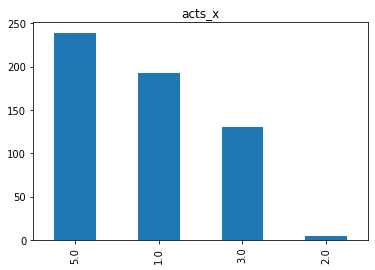

In [74]:
# Etude des occurrences du nombre d'actes :
# On remarque que l'écart-type de 1,7 est très grand 
# On remarque une occurence presque égale, et surtout très importante des extrêmes : pièces en 1 acte et pièces en 5 actes
# Ainsi, l'on peut supposer que conformément à la tradition en vigueur au XVIIIe sièce, une soirée à la C-F se déroulait avec 
# pièce longue (3 ou 5 actes), suivie par une pièce courte (1 ou 2 actes). 

g = CF_saison['acts_x']
Freq_Genre = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Genre)

CF_saison['acts_x'].value_counts().plot(kind='bar', title='acts_x')

### 2. Présence de musique, danse ou machines ?

In [75]:
g = CF_saison['musique_danse_machine']
Freq_Musique = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Musique)


       counts  percentage
False     414   73.144876
True      152   26.855124


### 3. Nature de la pièce

                      counts  percentage
vers                     366   64.664311
prose                    168   29.681979
vers et vers libres       10    1.766784
prose/vers                 9    1.590106
vers libres                7    1.236749
prose et vers libres       6    1.060071


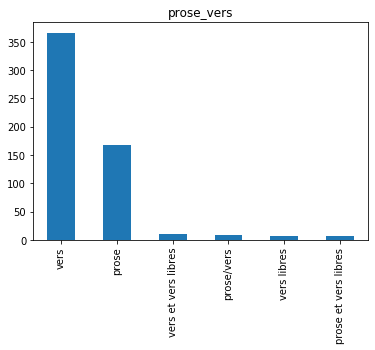

In [76]:
g = CF_saison['prose_vers']
Freq_Nature = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Nature)

CF_saison['prose_vers'].value_counts().plot(kind='bar', title='prose_vers')

### 4.Genre de la pièce

                          counts  percentage
comédie                      427   75.441696
tragédie                     116   20.494700
comédie héroïque               8    1.413428
comédie-ballet                 7    1.236749
tragi-comédie / tragédie       4    0.706714
tragi-comédie                  3    0.530035
intermède                      1    0.176678


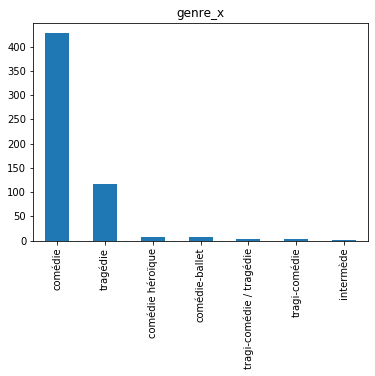

In [77]:
g = CF_saison['genre_x']
Freq_Genre = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Genre)

CF_saison['genre_x'].value_counts().plot(kind='bar', title='genre_x')

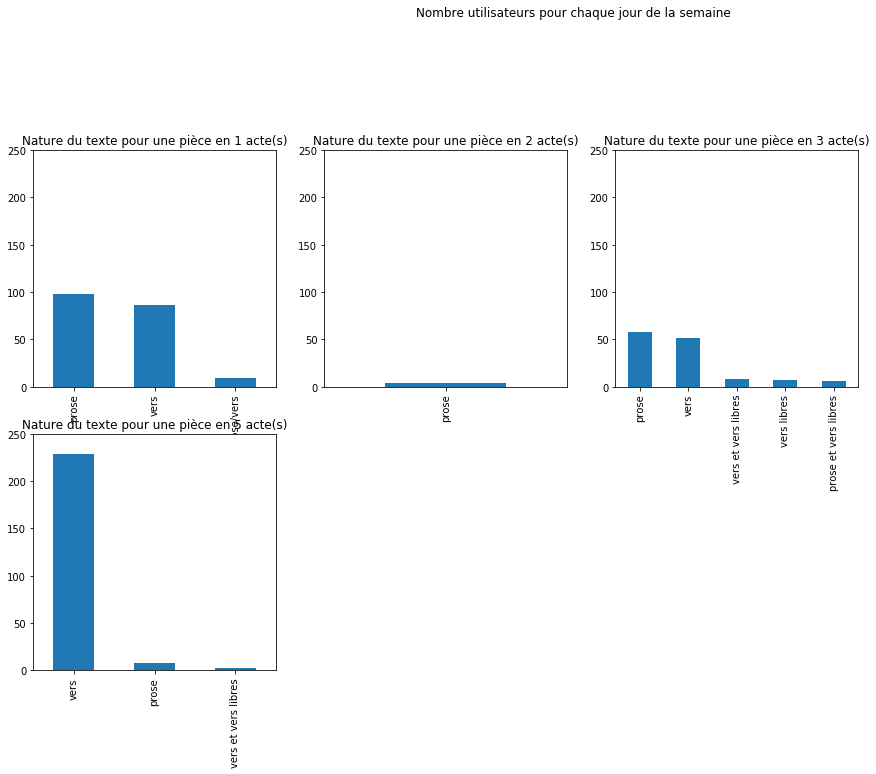

In [78]:
## En fonction du nombre d'acte de la pièce

actes=[1.0, 2.0, 3.0, 5.0]

plt.figure(1,figsize = (20, 20))
plt.suptitle('Nombre utilisateurs pour chaque jour de la semaine')

for i in actes :
    plt.subplot(4,4,i, title="Nature du texte pour une pièce en " + str(int(i)) + ' acte(s)')
    plt.ylim(ymax=250)
    CF_saison[(CF_saison['acts_x'] == i)]['prose_vers'].value_counts().plot(kind='bar')
                                                                            

In [85]:
### Ménage pour une data viz plus épurée 

test =  CF_saison.loc[CF_saison['prose_vers'].isin(['prose', 'vers'])]

test =  test.loc[test['genre_x'].isin(['comédie', 'tragédie'])]

test =  test.loc[test['acts_x'].isin([1.0, 3.0, 5.0])]



test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 407 to 54659
Data columns (total 10 columns):
author_x                  507 non-null object
title                     507 non-null object
genre_x                   507 non-null object
performance_date          507 non-null object
first_performance_date    386 non-null object
acts_x                    507 non-null float64
alternative_title         397 non-null object
musique_danse_machine     507 non-null bool
prologue                  507 non-null bool
prose_vers                507 non-null object
dtypes: bool(2), float64(1), object(7)
memory usage: 36.6+ KB


In [86]:
long_nat_genre = pd.crosstab(index=test["acts_x"], 
                             columns=[test["prose_vers"],
                                      test["genre_x"]],
                             margins=True)   # Include row and column totals

long_nat_genre

prose_vers   prose    vers           All
genre_x    comédie comédie tragédie     
acts_x                                  
1.0             98      85        0  183
3.0             55      47        0  102
5.0              8      98      116  222
All            161     230      116  507

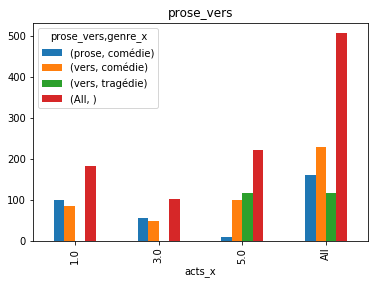

In [89]:
long_nat_genre.plot(kind='bar', title='prose_vers')